# Arabic Sentiment Analysis

## Test Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

## Data Loading

In [2]:
test_df = pd.read_csv("/content/test.csv")

In [3]:
test_df

,review_description,rating
0,الثلاثاء القادم مرحبا بك يا,1
1,اعجبني بصراحة وما احس الاسعار فية غالية والتوص...,1
2,مافي ماكدونالدز,-1
3,الطلب وصلني ناقص مع علم المطعم مع ذلك تم أخذ م...,-1
4,انا عايز اشتري ابلكيشن طالبات,1
...,...,...
6402,تطبيق ممتع وسهل الاستخدام,1
6403,يستاهل,1
6404,جميل ونظيف ومواعيد مظبوطه,1
6405,مش عارف انزلو تنزيلو زنخ ما بنصحكم اتجربو,-1


In [4]:
print("Test Shape:", test_df.shape)
print(test_df.head())

Test Shape: (6407, 2)
                                  review_description  rating
0                        الثلاثاء القادم مرحبا بك يا       1
1  اعجبني بصراحة وما احس الاسعار فية غالية والتوص...       1
2                                    مافي ماكدونالدز      -1
3  الطلب وصلني ناقص مع علم المطعم مع ذلك تم أخذ م...      -1
4                      انا عايز اشتري ابلكيشن طالبات       1


## Text Preprocessing

In [5]:
def normalize_arabic(text):
    text = re.sub(r"[إأآا]", "ا", text)
    text = re.sub(r"ى", "ي", text)
    text = re.sub(r"ؤ", "ء", text)
    text = re.sub(r"ئ", "ء", text)
    text = re.sub(r"ة", "ه", text)
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    return text

test_df["clean_text"] = test_df["review_description"].astype(str).apply(normalize_arabic)

In [6]:
test_df

,review_description,rating,clean_text
0,الثلاثاء القادم مرحبا بك يا,1,الثلاثاء القادم مرحبا بك يا
1,اعجبني بصراحة وما احس الاسعار فية غالية والتوص...,1,اعجبني بصراحه وما احس الاسعار فيه غاليه والتوص...
2,مافي ماكدونالدز,-1,مافي ماكدونالدز
3,الطلب وصلني ناقص مع علم المطعم مع ذلك تم أخذ م...,-1,الطلب وصلني ناقص مع علم المطعم مع ذلك تم اخذ م...
4,انا عايز اشتري ابلكيشن طالبات,1,انا عايز اشتري ابلكيشن طالبات
...,...,...,...
6402,تطبيق ممتع وسهل الاستخدام,1,تطبيق ممتع وسهل الاستخدام
6403,يستاهل,1,يستاهل
6404,جميل ونظيف ومواعيد مظبوطه,1,جميل ونظيف ومواعيد مظبوطه
6405,مش عارف انزلو تنزيلو زنخ ما بنصحكم اتجربو,-1,مش عارف انزلو تنزيلو زنخ ما بنصحكم اتجربو


## Load Tokenizer & Prepare Data

In [8]:
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

MAX_LEN = 100
X_test = tokenizer.texts_to_sequences(test_df["clean_text"])
X_test = pad_sequences(X_test, maxlen=MAX_LEN)

y_test = test_df["rating"].replace({-1:0, 1:1}).values

## Load Saved Models

In [15]:
rnn_model = load_model("rnn_model.h5")
lstm_model = load_model("lstm_model.h5")
gru_model = load_model("gru_model.h5")

print("✅ Models loaded successfully!")

✅ Models loaded successfully!


##  Evaluation Function

In [11]:
def evaluate_model(model, X, y, model_name):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    print(f"\n===== {model_name} Evaluation on Test Set =====")
    print(classification_report(y, y_pred, digits=4))

    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

===== RNN Evaluation on Test Set =====
              precision    recall  f1-score   support

           0     0.7557    0.8411    0.7961      2581
           1     0.8840    0.8165    0.8489      3826

    accuracy                         0.8264      6407
   macro avg     0.8198    0.8288    0.8225      6407
weighted avg     0.8323    0.8264    0.8276      6407



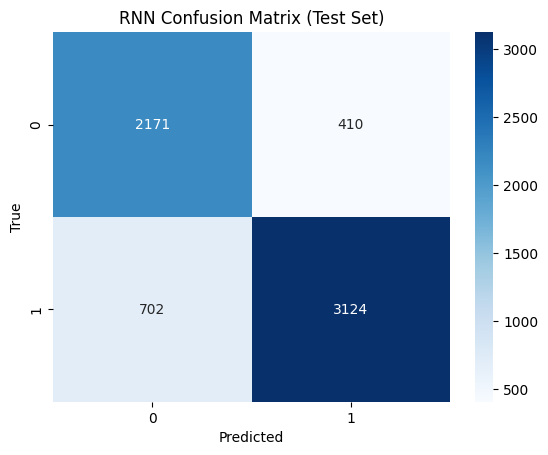

In [17]:
evaluate_model(rnn_model, X_test, y_test, "RNN")

201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step

===== LSTM Evaluation on Test Set =====
              precision    recall  f1-score   support

           0     0.7849    0.7846    0.7847      2581
           1     0.8547    0.8549    0.8548      3826

    accuracy                         0.8266      6407
   macro avg     0.8198    0.8198    0.8198      6407
weighted avg     0.8266    0.8266    0.8266      6407



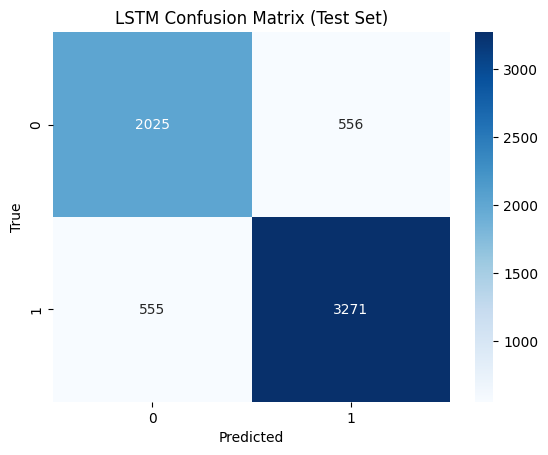

In [18]:
evaluate_model(lstm_model, X_test, y_test, "LSTM")

201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step

===== GRU Evaluation on Test Set =====
              precision    recall  f1-score   support

           0     0.8001    0.7892    0.7946      2581
           1     0.8591    0.8670    0.8630      3826

    accuracy                         0.8356      6407
   macro avg     0.8296    0.8281    0.8288      6407
weighted avg     0.8353    0.8356    0.8355      6407



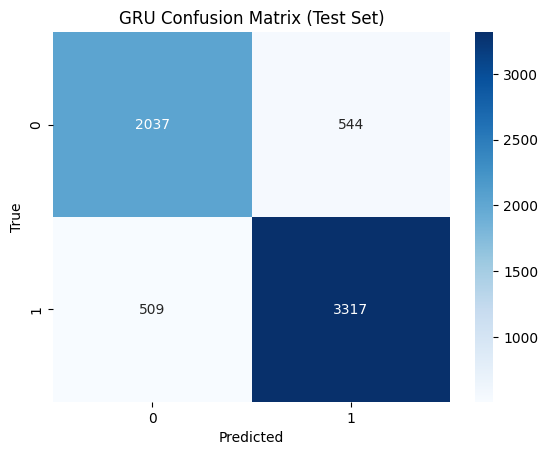

In [19]:
evaluate_model(gru_model, X_test, y_test, "GRU")

## Final Results Table

In [20]:
def get_final_metrics(model, X, y, model_name):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    report = classification_report(y, y_pred, output_dict=True)
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1": report["1"]["f1-score"]
    }


In [21]:
results = []
results.append(get_final_metrics(rnn_model, X_test, y_test, "RNN"))
results.append(get_final_metrics(lstm_model, X_test, y_test, "LSTM"))
results.append(get_final_metrics(gru_model, X_test, y_test, "GRU"))

results_df = pd.DataFrame(results)
print(results_df)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
  Model  Accuracy  Precision    Recall        F1
0   RNN  0.826440   0.883984  0.816519  0.848913
1  LSTM  0.826596   0.854716  0.854940  0.854828
2   GRU  0.835649   0.859104  0.866963  0.863015


RNN: Better than on validation, but still the weakest model (struggles more with recall).

LSTM: Strong balance, with both precision and recall ~0.85.

GRU: Best on the test set — slightly higher accuracy, recall, and F1-score than LSTM.

✅ Winner on Test Set: GRU

⚖️ Close second: LSTM

❌ Weaker: RNN